# Using a Random Forest Regressor to Find Most Influential Features

In [1]:
import pandas as pd

domain_dataset = pd.read_parquet("../data/curated/features_domain.parquet")

In [2]:
domain_dataset.head(10)

,url,price,address,property_type,latitude,longitude,Beds,Baths,Parking,bond,...,P20/P50,P10/P50,Gini coefficient,Top 1%,Top 5%,Top 10%,Lowest Quartile,Second Quartile,Third Quartile,Highest Quartile
0,https://www.domain.com.au/10-allara-court-donv...,"$1,400.00","10 Allara Court, Donvale VIC 3111",Townhouse,-37.774273,145.181126,4.0,3.0,2.0,9125.0,...,0.32,0.11,0.555,13.1,27.9,39.7,28.5,22.1,19.0,30.4
1,https://www.domain.com.au/7-pine-ridge-donvale...,$750 per week,"7 Pine Ridge, Donvale VIC 3111",House,-37.791251,145.175649,4.0,2.0,0.0,3259.0,...,0.32,0.11,0.555,13.1,27.9,39.7,28.5,22.1,19.0,30.4
2,https://www.domain.com.au/20-mulsanne-way-donv...,$1300 per week,"20 Mulsanne Way, Donvale VIC 3111",House,-37.797232,145.181264,5.0,2.0,2.0,5649.0,...,0.32,0.11,0.555,13.1,27.9,39.7,28.5,22.1,19.0,30.4
3,https://www.domain.com.au/3-monterey-crescent-...,$825pw / $3585pcm,"3 Monterey Crescent, Donvale VIC 3111",House,-37.792402,145.174323,3.0,1.0,5.0,3585.0,...,0.32,0.11,0.555,13.1,27.9,39.7,28.5,22.1,19.0,30.4
4,https://www.domain.com.au/3-49-leslie-street-d...,$680.00,"3/49 Leslie Street, Donvale VIC 3111",Townhouse,-37.781012,145.180705,3.0,2.0,2.0,2955.0,...,0.32,0.11,0.555,13.1,27.9,39.7,28.5,22.1,19.0,30.4
5,https://www.domain.com.au/6-81-97-mitcham-road...,$575.00,"6/81-97 Mitcham Road, Donvale VIC 3111",Townhouse,-37.797814,145.181397,2.0,1.0,2.0,2499.0,...,0.32,0.11,0.555,13.1,27.9,39.7,28.5,22.1,19.0,30.4
6,https://www.domain.com.au/4-49-leslie-street-d...,$680.00,"4/49 Leslie Street, Donvale VIC 3111",Townhouse,-37.780842,145.180724,3.0,2.0,2.0,2955.0,...,0.32,0.11,0.555,13.1,27.9,39.7,28.5,22.1,19.0,30.4
7,https://www.domain.com.au/10-51-55-leslie-stre...,$500 Per Week,"10/51-55 Leslie Street, Donvale VIC 3111",Apartment / Unit / Flat,-37.781431,145.181474,2.0,1.0,1.0,2173.0,...,0.32,0.11,0.555,13.1,27.9,39.7,28.5,22.1,19.0,30.4
8,https://www.domain.com.au/6-martha-street-donv...,$695 per week,"6 Martha Street, Donvale VIC 3111",Apartment / Unit / Flat,-37.795872,145.174319,3.0,2.0,1.0,3020.0,...,0.32,0.11,0.555,13.1,27.9,39.7,28.5,22.1,19.0,30.4
9,https://www.domain.com.au/55-darvall-street-do...,$800.00,"55 Darvall Street, Donvale VIC 3111",House,-37.802745,145.175619,4.0,2.0,2.0,3476.0,...,0.32,0.11,0.555,13.1,27.9,39.7,28.5,22.1,19.0,30.4


In [3]:

import pandas as pd

# Assuming 'domain_dataset' is your DataFrame and already loaded

# List of columns you want to drop
columns_to_drop = ['bond', 'Facility Count', 'price', 'index_right', 'chg_flag', 'chg_lbl', 'property_id', 'nearest_hospital_id', 'nearest_station_id', 'latitude', 'longitude']  # Replace with actual column names

# Dropping the columns
domain_dataset = domain_dataset.drop(columns_to_drop, axis=1)

# Now, 'domain_dataset' will no longer include the columns listed in 'columns_to_drop'


In [4]:
import pandas as pd

# Assuming 'domain_dataset' is your DataFrame and already loaded

# Calculating the number of missing values for each feature
missing_values = domain_dataset.isnull().sum()

# Filtering out features that have missing values
missing_values = missing_values[missing_values > 0]

# Displaying the features and their counts of missing values
print(missing_values)


Beds                            136
Baths                            67
Parking                           9
train_station_distance_km         2
mean_stores                    5373
total_stores                   5373
count_shopping_centres         5373
ERP_2021                          2
ERP_2026                          2
ERP_2031                          2
population_growth_2021_2026       2
population_growth_2026_2031       2
population_growth_2031_2036       2
total_population_growth           2
total_value_of_items           3853
total_number_of_items          3853
crime_frequency                3853
P80/P20                           5
P80/P50                           5
P20/P50                           5
P10/P50                           5
Gini coefficient                  5
Top 1%                            5
Top 5%                            5
Top 10%                           5
Lowest Quartile                   2
Second Quartile                   2
Third Quartile              

In [5]:
import pandas as pd

# Assuming 'domain_dataset' is your DataFrame and already loaded

# Columns you want to impute with 0
columns_to_impute = ['mean_stores', 'total_stores', 'count_shopping_centres', 'total_value_of_items', 'total_number_of_items', 'crime_frequency']

# Imputing missing values with 0 for these specific columns
domain_dataset[columns_to_impute] = domain_dataset[columns_to_impute].fillna(0)

# Check to confirm that the imputation was successful
print(domain_dataset[columns_to_impute].isnull().sum())


mean_stores               0
total_stores              0
count_shopping_centres    0
total_value_of_items      0
total_number_of_items     0
crime_frequency           0
dtype: int64


In [6]:
import pandas as pd

# Assuming 'domain_dataset' is your DataFrame and already loaded

# Calculating the number of missing values for each feature
missing_values = domain_dataset.isnull().sum()

# Filtering out features that have missing values
missing_values = missing_values[missing_values > 0]

# Displaying the features and their counts of missing values
print(missing_values)


Beds                           136
Baths                           67
Parking                          9
train_station_distance_km        2
ERP_2021                         2
ERP_2026                         2
ERP_2031                         2
population_growth_2021_2026      2
population_growth_2026_2031      2
population_growth_2031_2036      2
total_population_growth          2
P80/P20                          5
P80/P50                          5
P20/P50                          5
P10/P50                          5
Gini coefficient                 5
Top 1%                           5
Top 5%                           5
Top 10%                          5
Lowest Quartile                  2
Second Quartile                  2
Third Quartile                   2
Highest Quartile                 2
dtype: int64


In [7]:
print(domain_dataset.columns)

Index(['url', 'address', 'property_type', 'Beds', 'Baths', 'Parking',
       'extracted_price', 'geometry', 'sa2_code', 'sa2_name',
       ...
       'P20/P50', 'P10/P50', 'Gini coefficient', 'Top 1%', 'Top 5%', 'Top 10%',
       'Lowest Quartile', 'Second Quartile', 'Third Quartile',
       'Highest Quartile'],
      dtype='object', length=103)


In [8]:
# Dropping rows with any NaN values
cleaned_df = domain_dataset.dropna()
print(len(cleaned_df))

9422


/var/folders/9c/2vbsxdnd7k7_tnzhl33znmpm0000gp/T/ipykernel_30338/3947353654.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = cleaned_df.corr()


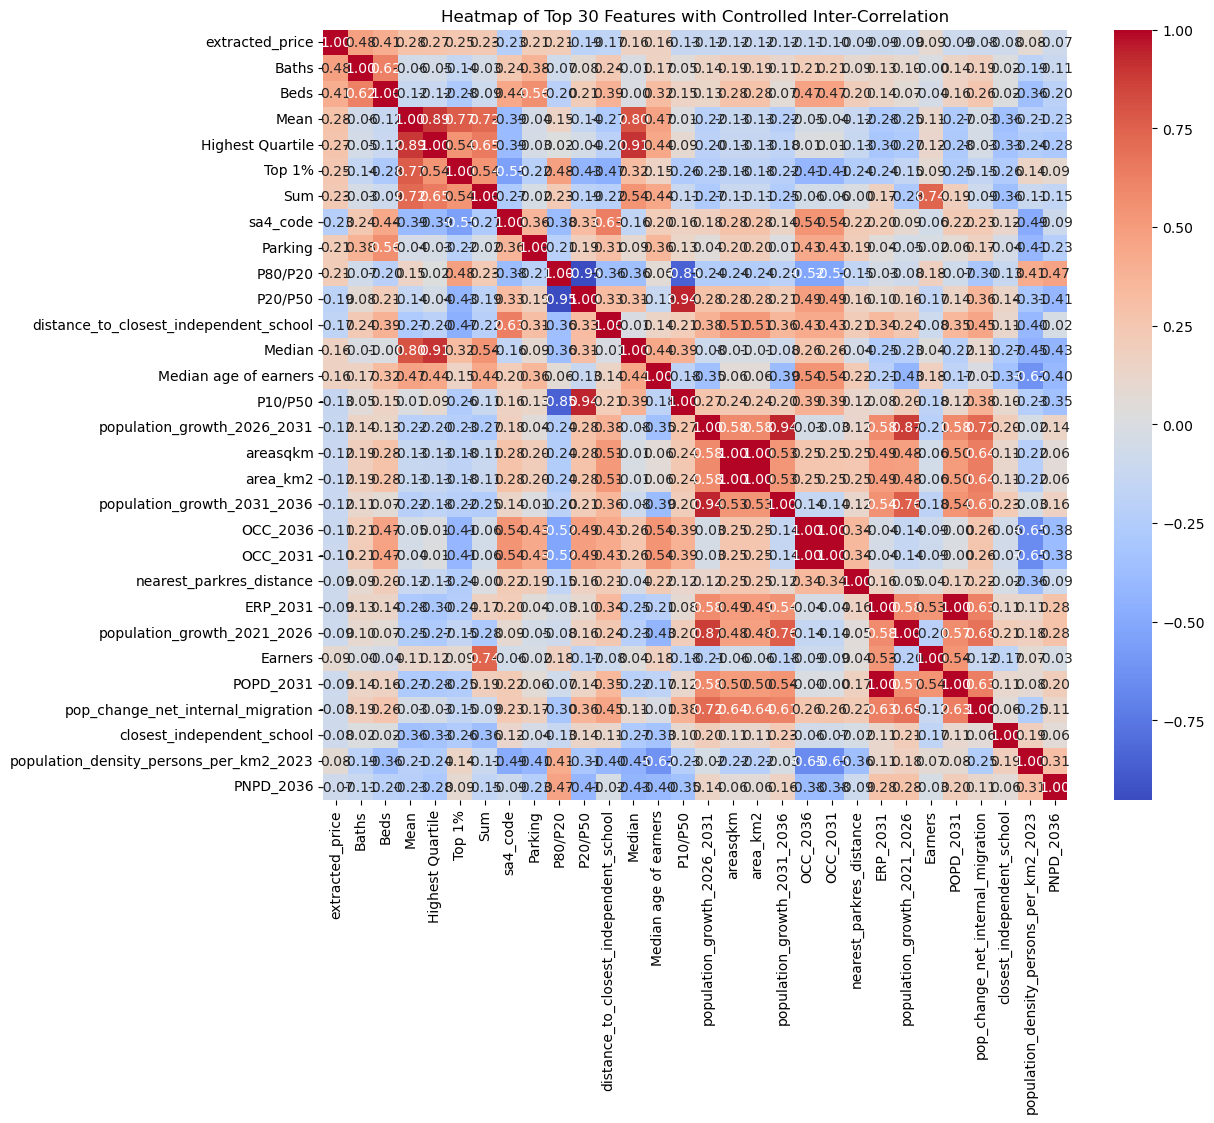

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'domain_dataset' is your DataFrame
corr_matrix = cleaned_df.corr()

# Extract the correlations with the target variable
target_corr = corr_matrix['extracted_price'].abs().sort_values(ascending=False)

# Select the top 50 features for initial analysis, including your target
top_features = target_corr.head(50).index

# Create a smaller correlation matrix for these top features
top_corr_matrix = corr_matrix.loc[top_features, top_features]

# Target number of features to retain
target_feature_count = 30

# List to keep track of features to drop
to_drop = []

while len(top_features) - len(to_drop) > target_feature_count:
    # Compute the current reduced correlation matrix
    current_corr_matrix = top_corr_matrix.drop(index=to_drop, columns=to_drop)
    # Calculate the mean absolute correlation of each feature with others
    mean_abs_corr = current_corr_matrix.apply(lambda x: x.abs().drop(x.name).mean(), axis=0)
    # Find the feature with the highest mean correlation
    max_corr_feature = mean_abs_corr.idxmax()
    to_drop.append(max_corr_feature)

# Remaining features after dropping
remaining_features = [feature for feature in top_features if feature not in to_drop]

# Final DataFrame with reduced feature set
final_corr_matrix = corr_matrix.loc[remaining_features, remaining_features]

# Visualizing the final set of features with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(final_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Top 30 Features with Controlled Inter-Correlation')
plt.show()


In [12]:
# Assuming 'domain_dataset' is your DataFrame and 'remaining_features' contains the list of feature names to retain
reduced_dataset = cleaned_df[remaining_features]

# Optionally, include the target variable if it's not already in 'remaining_features'
if 'extracted_price' not in remaining_features:
    reduced_dataset['extracted_price'] = cleaned_df['extracted_price']

# Now 'reduced_dataset' contains only the features of interest
print(reduced_dataset.head())  # Displaying the first few rows of the new DataFrame to verify


   extracted_price  Baths  Beds   Mean  Highest Quartile  Top 1%        Sum  \
0           1400.0    3.0   4.0  83728              30.4    13.1  872950324   
1            750.0    2.0   4.0  83728              30.4    13.1  872950324   
2           1300.0    2.0   5.0  83728              30.4    13.1  872950324   
3            825.0    1.0   3.0  83728              30.4    13.1  872950324   
4            680.0    2.0   3.0  83728              30.4    13.1  872950324   

   sa4_code  Parking  P80/P20  ...  OCC_2031  nearest_parkres_distance  \
0       211      2.0     6.95  ...      0.96                  3541.030   
1       211      0.0     6.95  ...      0.96                  2536.544   
2       211      2.0     6.95  ...      0.96                  1822.385   
3       211      5.0     6.95  ...      0.96                  2586.472   
4       211      2.0     6.95  ...      0.96                  2935.490   

       ERP_2031  population_growth_2021_2026  Earners     POPD_2031  \
0  17104.

In [13]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'domain_dataset' is your DataFrame and already loaded
numeric_df = reduced_dataset.select_dtypes(include=[np.number])
# Separating the independent variables and the dependent variable
X = numeric_df.drop('extracted_price', axis=1)
y = numeric_df['extracted_price']

# Ensure all categorical variables are encoded if not already done
# You can use pd.get_dummies(X, drop_first=True) if necessary

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Getting feature importances
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Displaying the top 10 most important features
print(feature_importances.head(10))


Mean Squared Error: 16142.86664785894
                                         importance
Baths                                      0.208534
sa4_code                                   0.194836
Beds                                       0.168021
nearest_parkres_distance                   0.073551
distance_to_closest_independent_school     0.071270
Parking                                    0.028144
Mean                                       0.028062
population_density_persons_per_km2_2023    0.024703
closest_independent_school                 0.021351
P80/P20                                    0.021315
